# Travelling Salesman Problem using Quantum Phase Estimation


### Table of Contents


1. [Introduction](#introduction)<br>
   1.1 [What is Travelling Salesman Problem](#tsp_definition)<br>
   1.2 [Time Complexity](#time_complexity)<br>
   1.3 [Brute Force Idea](#bf_idea)<br>
   1.4 [Importantness](#important)<br>
   1.5 [Quantum Computer Approach](#q_approach)<br>
2. [Approach](#approach)<br>
3. [General Strategy](#general_strategy)<br>
   3.1 [Unitary Matrix](#unitary_matrix)<br>
   3.2 [Eigenstates](#eigenstates)<br>
4. [Building the components](#components)<br>
   4.1 [Unitaries](#unitaries)<br>
5. [Circuit](#circuit)<br>
   5.1 [QASM Simulator](#qasm_simulator)<br>
6. [Conclusion](#conclusion)<br>
7. [References](#references)<br>
8. [Version Information](#version_information)

### Introduction <a id="introduction"></a>



#### What is the Travelling Salesman Problem ?  <a id="tsp_definition"></a>

The Travelling Salesman Problem belongs to the class of NP-Hard problems in combinatorial optimization. The problem is:
 > "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly        once and returns to the origin city?"

The similar Hamiltonian cycle problem is:
 > "The cycle of visiting each vertex once in a graph, and returning to the starting vertex is known as a Hamiltonian cycle. Given a graph, determine whether it contains a Hamiltonian cycle or not."

The Hamiltonian cycle problem is NP-Hard. The Hamiltonian cycle problem can be converted to the Travelling Salesman Problem.

This looks a lot similar to the TSP. Actually, the Hamiltonian cycle is at the heart of the TSP. That's why these 2 problems are interconnected and solving one will solve the other.

#### What is the time complexity of it ? <a id="time_complexity"></a>

Multiple techniques are used to solve this problem:
  1. Brute Force Method: Find every possible combination of all the vertices.
$$
O(n\ !)\ \text{where n = Number of vertex/nodes of the graph} 
$$

  2. Dynamic Programming: Break the problem into smaller problems, compute those smaller problems and whenever needed use the result of those small problems, instead of computing same chunk over and over.
$$
O(n^22^n)\ \text{where n = Number of vertex/nodes of the graph}
$$

  3. Branch and Bound:  Branch and Bound refers to all the state space search methods in which we generate the childern of all the expanded nodes, before making any live node an expanded one. In this method, we find the most promising node and expand it. The term "promising node" means "choosing a node that can expand and give us an optimal solution". We start from the root and expand the tree until we approach an optimal (minimum cost in case of this problem) solution.
$$
O(n^22^n)\ \text{where n = Number of vertex/nodes of the graph}
$$

  4. Heuristic Approach: Heuristic approaches are based on providing a set of rules on optimal selection of next city to travel. But this does not give optimal solution in every case as heuristics result in approximations.


#### Why is brute force not a good idea ? <a id="bf_idea"></a>

 The time complexity of TSP using brute force technique is $O(n\ !)\ \text{where n = number of nodes}$. Now imagine using $n\ =\ 10$, then we will get $10\ !\ =\ 36,28,00$, which has $6$ digits. Now imagine $20\ !\ =\ 24,32,90,20,08,17,66,40,000$, which has $19$ digits. Now imagine $100\ !\ =\ ....$, it has 158 digits so on. So, as the no. of nodes increases, the time complexity increases exponentially. So, using brute force is not an optimal way to solve TSP. 


#### Why is it important ? <a id="important"></a>

The Travelling salesman problem is very important in theoretical computer science and operational research. Every scientist trying to find an algorithm which can solve it in polynomial time. The reason of this importance is not specifically TSP, but instead the class to which TSP belongs to. Its the NP class. If we can find an algorithm for TSP, it will open an wide range of possibilitis for the thousands of other problems which belongs to the same class.
The travelling purchaser problem and the vehicle routing problem are both generalizations of TSP.

#### Why are quantum computers used to approach this problem instead of classical computers? <a id="q_approach"></a>

Recently, quantum computers are being used to approach these kinds of problems using various techniques, even though we have supercomputers all over the world. It's beacuse of the fact of what a quantum computer can do over classical computer, using the wierdness of quantum mechanics and all the different properties which only a quantum computer can possess/provide and using algorithm developed for quantum computer over the years. Even though after using quantum computer, it doesn't guarantee it will solve the problem. But it's a new way to aproach these kinds of class problems.

Some of these techniques involve quantum heuristic algorithms, generalizing Grover Search, Bounded-degree graphs, QAOA etc.

### Approach <a id="approach"></a>

Lets consider the whole problem in terms of graphs. The cities are represented as vertices, and the cost/path as edges.

* We approach the problem by encoding the given distances/cost between the cities as phases.
* Each city is connected to other cities with a specific cost associated to each connection.
* We construct unitary operators whose eigenvectors are the computational basis states and eigenvalues are various combinations of these phases.
* Then we apply phase estimation algorithm to certain eigenstates which gives us all the total distances possible for all the routes.
* After obtaining the distances we can search through this information using the quantum search algorithm for
finding the minimum to find the least possible distance as well the route taken.
* This provides us a quadratic speedup over the classical brute force method for a large number of cities.

### General Strategy <a id="general_strategy"></a>



So, now that we have gone through the general approach, we have an idea of what to do. Now let's explain step by step:

* Lets consider the travelling salesman problem as an undirected complete graph, whose vertices represent cities and whose edges represent cost/distance. 

* Before going any further, lets consider the case where the number of cities/nodes $n\ =\ 4$.

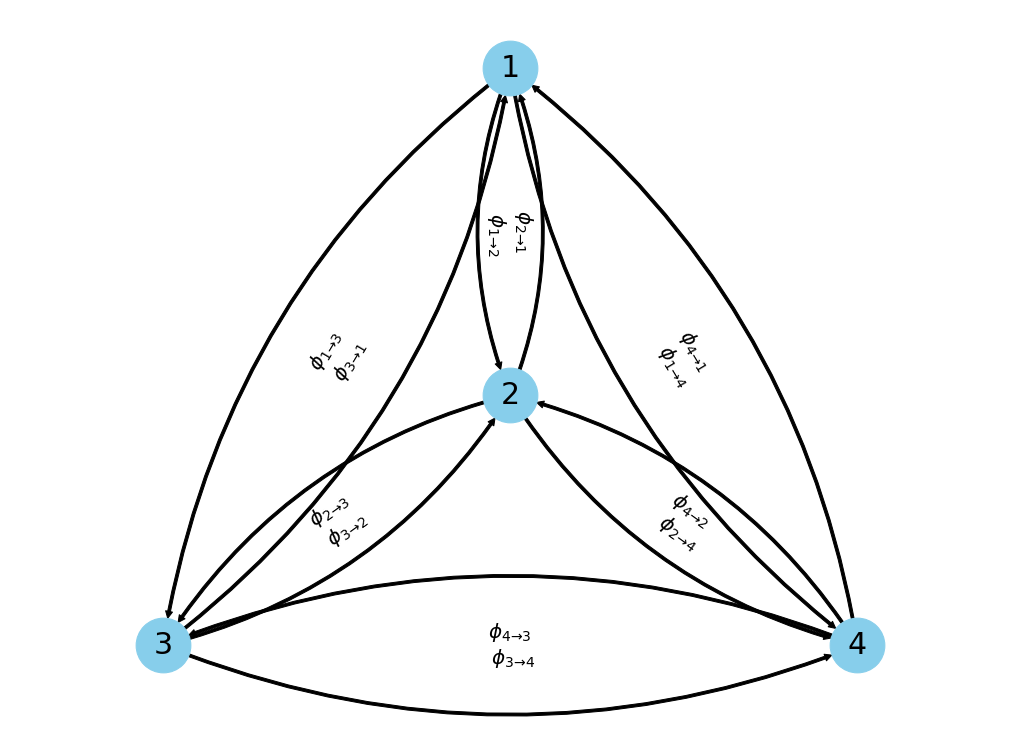

In [36]:
# Building the graph with nodes = 4

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(directed=True)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)

G.add_edge(2, 1)
G.add_edge(2, 3)
G.add_edge(2, 4)

G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(3, 4)

G.add_edge(4, 1)
G.add_edge(4, 2)
G.add_edge(4, 3)

pos = {1: [0.75, 1.0],
      2: [0.75, 0.15],
      3: [0.5, -0.5],
      4: [1.0, -0.5]}


edge_labels = {(1, 2): '$\\phi_{2\\to 1}$\n $\\phi_{1\\to 2}$',
              (1, 3): '$\\phi_{1\\to 3}$\n $\\phi_{3\\to 1}$',
              (1, 4): '$\\phi_{4\\to 1}$\n $\\phi_{1\\to 4}$',
              (2, 3): '$\\phi_{2\\to 3}$\n $\\phi_{3\\to 2}$',
              (2, 4): '$\\phi_{4\\to 2}$\n $\\phi_{2\\to 4}$',
              (3, 4): '$\\phi_{4\\to 3}$\n $\\phi_{3\\to 4}$'
              }

fig = plt.figure(1, figsize=(14, 10)) 
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos, connectionstyle='arc3, rad = 0.2', 
        node_size=3000, arrowsize=14, arrowstyle='simple', font_size=30)

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20, bbox=dict(alpha=0))
 
plt.show()


* We encode the given distance/cost as phases($\phi$).
$$
\phi_{i\to j}\ \text{means cost encoded as phase from city 'i' to city 'j', where i,j $\in$ [1,n]}
$$
For example: $\phi_{1\to 2}$ means from city/node '1' to city/node '2'. $\phi_{2\to 3}$ means from city/node '2' to city/node '3' so on. In case of self-loop i.e $\phi_{i\to i}$ the cost is '0'.
 
* The classical brute force method uses an $n\times n$ matrix to store the distance/cost between each pair of nodes.
$$
A\ =\ \begin{bmatrix}
\phi_{1\to 1}&\phi_{1\to 2}&\phi_{1\to 3}&\phi_{1\to 4}\\
\phi_{2\to 1}&\phi_{2\to 2}&\phi_{2\to 3}&\phi_{2\to 4}\\
\phi_{3\to 1}&\phi_{3\to 2}&\phi_{3\to 3}&\phi_{3\to 4}\\
\phi_{4\to 1}&\phi_{4\to 2}&\phi_{4\to 3}&\phi_{4\to 4}\\
\end{bmatrix}
$$

Note that all the diagonal elements in this matrix $\text{A}$ are '0'.

But on representing this matrix as only phases:
1. The matrix made of the given distances using the above procedure is not unitary in general, which means the implementation and manipulation of this operator is not possible on a quantum computer. 
2. The phases will get added when we multiply them or take tensor products of states with these phases as coefficients, that is the distances will get added as phases which is required for the search.

So, we represent the matrix as:
$$
B\ =\ \begin{bmatrix}
e^{i\phi_{1\to 1}} & e^{i\phi_{1\to 2}} & e^{i\phi_{1\to 3}} & e^{i\phi_{1\to 4}}\\
e^{i\phi_{2\to 1}} & e^{i\phi_{2\to 2}} & e^{i\phi_{2\to 3}} & e^{i\phi_{2\to 4}}\\
e^{i\phi_{3\to 1}} & e^{i\phi_{3\to 2}} & e^{i\phi_{3\to 3}} & e^{i\phi_{3\to 4}}\\
e^{i\phi_{4\to 1}} & e^{i\phi_{4\to 2}} & e^{i\phi_{4\to 3}} & e^{i\phi_{4\to 4}}\\
\end{bmatrix}
$$

Here, all the diagonal elements of this matrix $\text{B}$ are '1'.

#### For unitary matrices: <a id="unitary_matrix"></a>

* Now we will construct a unitary matrix ($U$) from the matrix $B$ for each city/node for the phase estimation as:
$$
U_{j}\ =\ (\sum_{i=1}^{n}B[j][i]\ \times\ \text{outer product of all possible basis vectors})\ \text{where j, i ≥ 0 and j, i $\in$ [1, n]}. 
$$
The rest of the elements in the matrix $U_{j}$ are set to zero. Basically, $U_{j}$ is a diagonal unitary matrix constructed from each of the columns of matrix $B$.

Lets construct the unitarie for j = 1, 2, 3, & 4:

1. $U_{1}$:  $e^{i\phi_{1\to 1}}|00\rangle\langle00| + e^{i\phi_{2\to 1}}|01\rangle\langle01| + e^{i\phi_{3\to 1}}|10\rangle\langle10| + e^{i\phi_{4\to 1}}|11\rangle\langle11|$

In quantum computing, we can write our matrices in terms of basis vectors. For more info refer to [Qiskit Textbook Single Qubit Gates](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)

$U_{j}$ are diagonal unitary matrices. It will be $n\times n\ (\text{here},\ 4\times4)$ matrices. And these matrics are expressed in terms of basis vectors with the phases as coefficients.

Now, lets break down $U_{1}$ part by part to see what's happening. Ultimately we have to make sure $U_{j}$ is a diagonal unitary matrix:

$|aa\rangle\langle aa|$, gives the position of the coefficient in the diagonal elements of the $4\times4$ matrix.
$$
|00\rangle\langle00|\ =\ (\begin{bmatrix}1\\0\end{bmatrix}\otimes\begin{bmatrix}1\\0\end{bmatrix})\ \otimes\ 
 (\begin{bmatrix}1&0\end{bmatrix}\otimes\begin{bmatrix}1&0\end{bmatrix})
=\ (\begin{bmatrix}1\\0\\0\\0\end{bmatrix}\otimes\begin{bmatrix}1&0&0&0\end{bmatrix})
=\ \begin{bmatrix}
  1 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0
  \end{bmatrix}
$$

<details>
    <summary>Similarly, we can find for $|01\rangle\langle01|$, $|10\rangle\langle10|$, $|11\rangle\langle11|$ (click to expand)</summary>
$$
|01\rangle\langle01|\ =\ (\begin{bmatrix}1\\0\end{bmatrix}\otimes\begin{bmatrix}0\\1\end{bmatrix})\ \otimes\ 
 (\begin{bmatrix}1&0\end{bmatrix}\otimes\begin{bmatrix}0&1\end{bmatrix})
=\ (\begin{bmatrix}0\\1\\0\\0\end{bmatrix}\otimes\begin{bmatrix}0&1&0&0\end{bmatrix})
=\ \begin{bmatrix}
  0 & 0 & 0 & 0\\ 
  0 & 1 & 0 & 0\\ 
  0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0
  \end{bmatrix}
$$
$$
|10\rangle\langle10|\ =\ (\begin{bmatrix}0\\1\end{bmatrix}\otimes\begin{bmatrix}1\\0\end{bmatrix})\ \otimes\ 
 (\begin{bmatrix}0&1\end{bmatrix}\otimes\begin{bmatrix}1&0\end{bmatrix})
=\ (\begin{bmatrix}0\\0\\1\\0\end{bmatrix}\otimes\begin{bmatrix}0&0&1&0\end{bmatrix})
=\ \begin{bmatrix}
  0 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\ 
  0 & 0 & 1 & 0\\
  0 & 0 & 0 & 0
  \end{bmatrix}
$$
$$
|11\rangle\langle11|\ =\ (\begin{bmatrix}0\\1\end{bmatrix}\otimes\begin{bmatrix}0\\1\end{bmatrix})\ \otimes\ 
 (\begin{bmatrix}1&1\end{bmatrix}\otimes\begin{bmatrix}0&1\end{bmatrix})
=\ (\begin{bmatrix}0\\0\\0\\1\end{bmatrix}\otimes\begin{bmatrix}0&0&0&1\end{bmatrix})
=\ \begin{bmatrix}
  0 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\ 
  0 & 0 & 0 & 0\\
  0 & 0 & 0 & 1
  \end{bmatrix}
$$
</details>

For more info refer to [Qiskit Textbook Density Matrix](https://qiskit.org/textbook/ch-quantum-hardware/density-matrix.html)

Next, we multiply these matrices with the phases as coefficients:
$$
e^{i\phi_{1\to1}}|00\rangle\langle00|\ =\ \begin{bmatrix}
e^{i\phi_{1\to1}} & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}
$$

<details>
    <summary>Same operation will be done for $e^{i\phi_{2\to1}}|01\rangle\langle01|$, $e^{i\phi_{3\to1}}|10\rangle\langle10|$, $e^{i\phi_{4\to1}}|11\rangle\langle11|$</summary>
$$
e^{i\phi_{2\to1}}|01\rangle\langle01|\ =\ \begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & e^{i\phi_{2\to1}} & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}
$$
$$
e^{i\phi_{3\to1}}|10\rangle\langle10|\ =\ \begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & e^{i\phi_{3\to1}} & 0\\
0 & 0 & 0 & 0
\end{bmatrix}
$$
$$
e^{i\phi_{4\to1}}|11\rangle\langle11|\ =\ \begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & e^{i\phi_{4\to1}}
\end{bmatrix}
$$
</details>
    
Then, adding them all up:
$$
\begin{aligned}
U_{1} &= e^{i\phi_{1\to1}}|00\rangle\langle00| + e^{i\phi_{2\to1}}|01\rangle\langle01| + e^{i\phi_{3\to1}}|10\rangle\langle10| + e^{i\phi_{4\to1}}|11\rangle\langle11|\\
&= \begin{bmatrix}
e^{i\phi_{1\to1}} & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & e^{i\phi_{2\to1}} & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & e^{i\phi_{3\to1}} & 0\\
0 & 0 & 0 & 0
\end{bmatrix} +
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & e^{i\phi_{4\to1}}
\end{bmatrix}\\
& = 
\begin{bmatrix}
e^{i\phi_{1\to1}} & 0 & 0 & 0\\ 
0 & e^{i\phi_{2\to1}} & 0 & 0\\ 
0 & 0 & e^{i\phi_{3\to1}} & 0\\
0 & 0 & 0 & e^{i\phi_{4\to1}}
\end{bmatrix}\\
\end{aligned}
$$

<details>
    <summary>In similar way, we have to find $U_{2},\ U_{3},\ U_{4}$</summary>

2. $U_{2}$: $e^{i\phi_{1\to 2}}|00\rangle\langle00| + e^{i\phi_{2\to 2}}|01\rangle\langle01| + e^{i\phi_{3\to 2}}|10\rangle\langle10| + e^{i\phi_{4\to 2}}|11\rangle\langle11|$
$$
\begin{bmatrix}
e^{i\phi_{1\to2}} & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +\ 
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & e^{i\phi_{2\to2}} & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +\ 
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & e^{i\phi_{3\to2}} & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +\ 
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & e^{i\phi_{4\to2}}
\end{bmatrix}\ =\ 
\begin{bmatrix}
e^{i\phi_{1\to2}} & 0 & 0 & 0\\ 
0 & e^{i\phi_{2\to2}} & 0 & 0\\ 
0 & 0 & e^{i\phi_{3\to2}} & 0\\
0 & 0 & 0 & e^{i\phi_{4\to2}}
\end{bmatrix}
$$

3. $U_{3}$: $e^{i\phi_{1\to 3}}|00\rangle\langle00| + e^{i\phi_{2\to 3}}|01\rangle\langle01| + e^{i\phi_{3\to 3}}|10\rangle\langle10| + e^{i\phi_{4\to 3}}|11\rangle\langle11|$
$$
\begin{bmatrix}
e^{i\phi_{1\to3}} & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +\ 
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & e^{i\phi_{2\to3}} & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +\ 
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & e^{i\phi_{3\to3}} & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +\ 
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & e^{i\phi_{4\to3}}
\end{bmatrix}\ =\ 
\begin{bmatrix}
e^{i\phi_{1\to3}} & 0 & 0 & 0\\ 
0 & e^{i\phi_{2\to3}} & 0 & 0\\ 
0 & 0 & e^{i\phi_{3\to3}} & 0\\
0 & 0 & 0 & e^{i\phi_{4\to3}}
\end{bmatrix}
$$

4. $U_{4}$: $e^{i\phi_{1\to 4}}|00\rangle\langle00| + e^{i\phi_{2\to 4}}|01\rangle\langle01| + e^{i\phi_{3\to 4}}|10\rangle\langle10| + e^{i\phi_{4\to 4}}|11\rangle\langle11|$
$$
\begin{bmatrix}
e^{i\phi_{1\to4}} & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +\ 
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & e^{i\phi_{2\to4}} & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +\ 
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & e^{i\phi_{3\to4}} & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\ +\ 
\begin{bmatrix}
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & e^{i\phi_{4\to4}}
\end{bmatrix}\ =\ 
\begin{bmatrix}
e^{i\phi_{1\to4}} & 0 & 0 & 0\\ 
0 & e^{i\phi_{2\to4}} & 0 & 0\\ 
0 & 0 & e^{i\phi_{3\to4}} & 0\\
0 & 0 & 0 & e^{i\phi_{4\to4}}
\end{bmatrix}
$$
</details>

* Now we see all the unitaries are of same form. So, lets generalize it:
$$
U_{j}\ =\ \begin{bmatrix}
e^{ia} & 0 & 0 & 0\\ 
0 & e^{ib} & 0 & 0\\ 
0 & 0 & e^{ic} & 0\\
0 & 0 & 0 & e^{id}
\end{bmatrix}   
$$
Putting $a,\ b,\ c,\ d$ different phases, will give $U_{1},\ U_{2},\ U_{3},\ U_{4}$.

* The quantum phase estimation algorithm uses phase kickback to write the phase of $U$(in the Fourier basis) to the $t$ qubits. When we use a qubit to control the $U$ gate, the qubit will turn (due to kickback) proportionally to the phase $e^{2iπθ}$. We need to introduce the controlled unitary $C−U$ that applies the unitary operator $U$ on the target register only if its corresponding control bit is $|1\rangle$.
For quantum phase estimation, we need controlled unitaries, so, we need to decompose these unitaries as controlled unitaries. We need to convert $U_{1},\ U_{2},\ U_{3},\ U_{4}$ to $CU_{1},\ CU_{2},\ CU_{3},\ CU_{4}$ respectively.
$$
\begin{aligned}
U_{j}\ &=\ \begin{bmatrix}
e^{ia} & 0 & 0 & 0\\ 
0 & e^{ib} & 0 & 0\\ 
0 & 0 & e^{ic} & 0\\
0 & 0 & 0 & e^{id}
\end{bmatrix}\\
&=\ 
\left(\begin{bmatrix}
1 & 0\\
0 & e^{i(c-a)}
\end{bmatrix}\ \otimes\ 
\begin{bmatrix}
e^{ia} & 0\\
0 & e^{ib}
\end{bmatrix}\right)\ .\ 
\begin{bmatrix}
1 & 0 & 0 & 0\\ 
0 & 1 & 0 & 0\\ 
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i(d-c+a-b)}
\end{bmatrix}\\
&=\ 
\begin{bmatrix}
e^{ia} & 0 & 0 & 0\\ 
0 & e^{ib} & 0 & 0\\ 
0 & 0 & e^{ic} & 0\\
0 & 0 & 0 & e^{id}
\end{bmatrix}\\
\end{aligned}
$$

* Finally, we need to find the tensor products of all the unitaries to find the overall unitary.

$$
U\ =\ U_{1}\ \otimes\ U_{2}\ \otimes\ U_{3}\ \otimes\ U_{4}.
$$

But as we discussed earlier, we need $\text{controlled}-U$ for the phase estimation.
$$
CU\ \equiv\ C\ (U_{1}\ \otimes\ U_{2}\ \otimes\ U_{3}\ \otimes\ U_{4})\ \equiv\ CU_{1}\ \otimes\ CU_{2}\ \otimes\ CU_{3}\ \otimes\ CU_{4}.
$$
The eigenvalues of this unitary matrix $U$, are estimated using the quantum phase estimation algorithm. The phases can be easily normalized to be bound within $\text{0}$ and $\text{2π}$ once we know the range of distances between the cities which is given to us in the problem. Here, $U$ is a diagonal matrix since it is a tensor product of $n$ diagonal matrices. This means that the eigenstates of this matrix $U$ are computational basis states with eigenvalues as the corresponding diagonal elements.

 **NOTE**: The quantum phase estimation algorithm (also referred to as quantum eigenvalue estimation) can be used
to estimate the eigenvalue (or phase) of an eigenvector of a unitary operator. For more information on quantum phase estimation, check the [Quantum Phase Estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html) qiskit textbook page.



#### For eigenstates: <a id="eigenstates"></a>

Now that we have developed the unitary matrix, let's analyze it.

* $U$ is diagonal matrix, since $U$ is the tensor product of diagonal matrices. So, out of $n^n$ elements in $U$, only the $(n-1)\! $ contain length of all distinct possible Hamiltonian cycles in TSP. Each eigenvector is represented as distinct Hamiltonian cycle. So, $(n-1)\ !$ eigenstates are possible of $U$ with eigenvalues being the total cost of the corresponding Hamiltonian cycle as phase. We estimate the phase corresponding to the route going through cities in some order and coming to the starting state.
The eigenstates are represented in binary form to convert the city to computational basis vectors using a function-
$$
|\psi\rangle\ =\ \otimes_{j}|i(j)−1\rangle\ where\ j\ \in\ [1..n]
$$
where the function $i(j)$ says- From which city we travelled to city $j$ ?

Lets analyze these concepts with our 4 city model-

* Our $U_{1},\ U_{2},\ U_{3},\ U_{4}$ is a $4\times4$ matrices. So, taking the tensor product of all ($=U$) will give total elements in $U$ as $4^4\ =\ 256$. Out of these $256$ elements, only the diagonals elements are non-zero.

* The number of distinct Hamiltonian cycle in our 4 city model = $(n-1)\ !$ = $(4-1)\ !$ = $3\ !$ = 6. And so, the no. of eigenstates is 6.

* Lets see how the eigenstates are calculated:

With 4 cities taken, the total combination of all possible Hamiltonian cycle is $n\!\ =\ 4\ !\ =\ 4\times3\times2\times1\ =\ 24$. Out of this $24$, $6$ are distinct Hamiltonian cycle.

Now, what do we mean by distinct? 

Well lets take the following paths, $1-2-3-4 \to 2-3-4-1 \to 3-4-1-2 \to 4-1-2-3$. If we can observe carefully we can see- $2-3-4-1$ is just the left rotation of $1-2-3-4$, that is if we rotate $1-2-3-4$ by 1, it wll become $2-3-4-1$. Similarly, if we rotate $2-3-4-1$ by 1 we get $3-4-1-2$, and again rotate by 1 we get $4-1-2-3$. 
So $2-3-4-1$, $3-4-1-2$, $4-1-2-3$ are just the circular permutation version of $1-2-3-4$. And most importantly the reason we are neglecting is because all 3 will provide the same cost as $1-2-3-4$.

Out of all possible combinations, pick the one which on circular permutation will give other combination.

We are taking the first $6$ states, since these states on different circular permutations will give all the states:

<table>
    <tr>
        <th>Possible States</th>
    </tr>
    <tr>
        <td>$1-2-3-4$</td>
    </tr>
    <tr>
        <td>$1-2-4-3$</td>
    </tr>
    <tr>
        <td>$1-4-2-3$</td>
    </tr>
    <tr>
        <td>$1-4-3-2$</td>
    </tr>
    <tr>
        <td>$1-3-2-4$</td>
    </tr>
    <tr>
        <td>$1-3-4-2$</td>
    </tr>
</table>

These $6$ distinct Hamiltonian cycles are not unique. We can also take one of the results of circular permutations in place of that. So, in place of $1-2-3-4$ we can also take $2-3-4-1$, as we saw above it is one of the circular permuatations of $1-2-3-4$.

If the cost of travelling from city $i$ to city $j$ is same cost as travelling from city $j$ to city $i$, then the number of distinct Hamiltonian cycle is $\frac{(n-1)\ !}{2}$. So, in $1-2-3-4$ and $1-2-4-3$, the cost of travelling from city $3$ to city $4$ is same as travelling from city $4$ to city $3$. So, $1-2-3-4$ and $1-2-4-3$ will produce the same total cost.

If the cost of travelling from city $i$ to city $j$ is not same cost as travelling from city $j$ to city $i$, then the number of distinct Hamiltonian cycle is $(n-1)\ !$. In our city model, it will be $3$.

* Now, lets see how the eigenstates are calculated from a sequence of paths. Let's recall our function $i(j)$, which states from which city we travelled to city $j$, to convert into binary form:

$$
|\psi\rangle\ =\ \otimes_{j}|i(j)−1\rangle\ \text{where j in [1..n]}
$$

So, lets take an example say $1-2-3-4$:
$$
i(1)\ =\ 4
$$
means from city 4 we travelled to city 1. So, we need to convert it to binary form for the computational basis states.
According to the formula-
$$
|i(1)-1\rangle\ =\ |4-1\rangle\ =\ |3_{10}\rangle\ =\ |11_{2}\rangle
$$

Similarly, we have to do for all the city in the sequence:
$$
|i(2)-1\rangle\ =\ |1-1\rangle\ =\ |0_{10}\rangle\ =\ |00_{2}\rangle
$$
$$
|i(3)-1\rangle\ =\ |2-1\rangle\ =\ |1_{10}\rangle\ =\ |01_{2}\rangle
$$
$$
|i(4)-1\rangle\ =\ |3-1\rangle\ =\ |2_{10}\rangle\ =\ |10_{2}\rangle
$$

Finally taking tensor product of all:
$$
|11\rangle\ \otimes\ |00\rangle\ \otimes\ |01\rangle\ \otimes\ |10\rangle\ =\ |11000110\rangle
$$
We found the eigenstates in binary form. 

For $1-2-4-3$:
$$
|i(1)-1\rangle\ =\ |3-1\rangle\ =\ |2_{10}\rangle\ =\ |10_{2}\rangle
$$
$$
|i(2)-1\rangle\ =\ |1-1\rangle\ =\ |0_{10}\rangle\ =\ |00_{2}\rangle
$$
$$
|i(4)-1\rangle\ =\ |2-1\rangle\ =\ |1_{10}\rangle\ =\ |01_{2}\rangle
$$
$$
|i(3)-1\rangle\ =\ |4-1\rangle\ =\ |3_{10}\rangle\ =\ |11_{2}\rangle
$$
$$
|10\rangle\ \otimes\ |00\rangle\ \otimes\ |01\rangle\ \otimes\ |11\rangle\ =\ |10000111\rangle
$$

Lets see all of them:


<table>
    <tr>
        <th>Sequence path</th>
        <th>Eigenstates</th>
    </tr>
    <tr>
        <td>$1-2-3-4$</td>
        <td>$|11000110\ \rangle$</td>
    </tr>
    <tr>
        <td>$1-2-4-3$</td>
        <td>$|10000111\ \rangle$</td>
    </tr>
    <tr>
        <td>$1-4-2-3$</td>
        <td>$|10001101\ \rangle$</td>
    </tr>
    <tr>
        <td>$1-4-3-2$</td>
        <td>$|01001110\ \rangle$</td>
    </tr>
    <tr>
        <td>$1-3-2-4$</td>
        <td>$|11001001\ \rangle$</td>
    </tr>
    <tr>
        <td>$1-3-4-2$</td>
        <td>$|01001011\ \rangle$</td>
    </tr>
</table>


If we consider the cost is same from going and returning, there will be $3$ sequence path out of $6$. For example we can take any one of $1-2-3-4$ or $1-2-4-3$, since cost from $3-4$ will be same as $4-3$.
So these $6$ will reduce to:


<table>
    <tr>
        <th>Sequence path</th>
        <th>Eigenstates</th>
    </tr>
    <tr>
        <td>$1-2-3-4$</td>
        <td>$|11000110\ \rangle$</td>
    </tr>
    <tr>
        <td>$1-4-2-3$</td>
        <td>$|10001101\ \rangle$</td>
    </tr>
    <tr>
        <td>$1-3-2-4$</td>
        <td>$|11001001\ \rangle$</td>
    </tr>
</table>



### Building the Components <a id="components"></a>

Now we have gone through all the theory, lets build it part by part:

#### For the Unitaries: <a id="unitaries"></a>

Building the unitary $U$ is the crucial part of quantum phase estimation. Building the $U$, means building $CU_{1},\ CU_{2},\ CU_{3},\ CU_{4}$.
Now if we remember we generalized $U_{j}$ and decomposed it in terms of controlled-unitaries.
$$
U_{j}\ =\ \begin{bmatrix}
e^{ia} & 0 & 0 & 0\\ 
0 & e^{ib} & 0 & 0\\ 
0 & 0 & e^{ic} & 0\\
0 & 0 & 0 & e^{id}
\end{bmatrix}\ =\ 
\left(\begin{bmatrix}
1 & 0\\
0 & e^{i(c-a)}
\end{bmatrix}\ \otimes\ 
\begin{bmatrix}
e^{ia} & 0\\
0 & e^{ib}
\end{bmatrix}\right)\ .\ 
\begin{bmatrix}
1 & 0 & 0 & 0\\ 
0 & 1 & 0 & 0\\ 
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i(d-c+a-b)}
\end{bmatrix}
$$
In this matrix, $\begin{bmatrix}1 & 0\\0 & e^{i(c-a)}\end{bmatrix}$ means an unitary gate $U1(c-a)$. Similarly, $\begin{bmatrix}e^{ia} & 0\\0 & e^{ib}\end{bmatrix}$ means an unitary gate $U1(b-a)$ when we factor out the global phase $e^{ia}$ from it and make it a unitary $U(a)$.
The matrix $\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\0 & 0 & 0 & e^{i(d-c+a-b)}\end{bmatrix}$ is a controlled unitary $CU1(d-c+a-b)$.

NOTE: $U1(\lambda)\ =\ P(\lambda)\ =\ \begin{bmatrix}1&0\\0&e^{i\lambda}\end{bmatrix}$. For more info see [Phase Gate in Qiskit Textbook](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#5.-The-P-gate--)

But we need to make $C-U_{j}$. For that, the matrix $U$ will change from a $4\times4$ matrix to $8\times8$ matrix.
$$
U_{j}\ \to\ CU_{j}\ =\ \begin{bmatrix}
e^{ia} & 0 & 0 & 0\\ 
0 & e^{ib} & 0 & 0\\ 
0 & 0 & e^{ic} & 0\\
0 & 0 & 0 & e^{id}
\end{bmatrix}\ \to\ 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & e^{ia} & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & e^{ib} & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & e^{ic} & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & e^{id}
\end{bmatrix}
$$
So, when we are converting $U_{j}$ to $C-U_{j}$, we have to control everything in $U_{j}$. So $U1(c-a)$ will become $CU1(c-a)$, $U1(b-a)$ to $CU1(b-a)$, $U1(a)$ act as global phase, will be on the control qubit. And most importantly, $CU1(d-c+a-b)$ will become $\text{controlled controlled}\ U1(d-c+a-b)$, i.e. $CCU1(d-c+a-b)$.

So, we can decompose any controlled controlled unitary by a series of unitary gates. By $\text{lemma}\ 6.1^{[2]}$:
<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780123838742000011-f01-11-9780123838742.gif">
where $V$ is unitary.

Similarly, using this we can decompose $\text{controlled controlled}\ U1(d-c+a-b)$. The $U$ in the image will be $U1(d-c+a-b)$, the $V$ will be $U1(d-c+a-b)$ and $V^{\dagger}$ will be $U1(-(d-c+a-b))$.


Lets analyze this $CCU1(d-c+a-b)$ using a test circuit

In [21]:
# Lets import all the necessary libraries
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister, execute
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import QFT
from numpy import pi

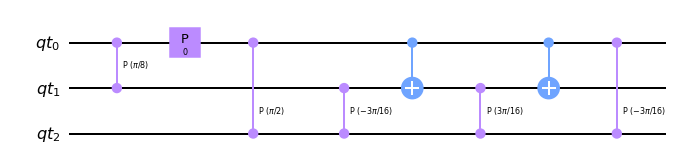

In [65]:
at = 0
bt = pi/2
ct = pi/8
dt = pi/4

qt = QuantumRegister(3, 'qt')
qct = QuantumCircuit(qt)

qct.cp(ct - at, qt[0], qt[1])
qct.p(at, qt[0])
qct.cp(bt - at, qt[0], qt[2])

qct.cp((dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp(-(dt - ct + at - bt)/2, qt[1], qt[2])
qct.cx(qt[0], qt[1])
qct.cp((dt - ct + at - bt)/2, qt[0], qt[2])

qct.draw()

#### Unitary Simulator

In [66]:
backend_unitary_t = Aer.get_backend('unitary_simulator')
job_unitary_t = execute(qct, backend_unitary_t, shots=8192)
count_unitary_t = job_unitary_t.result().get_unitary()
array_to_latex(count_unitary_t, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

See the unitary matrix we are getting above is not exactly like
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & e^{ia} & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & e^{ib} & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & e^{ic} & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & e^{id}
\end{bmatrix}
$$
but kind of rearranged version of this. Though the matrix we are getting and the $CU_{j}$ matrix is mathematically same. This is because Qiskit interpret the tensor product from bottom qubit to top qubit. So to get exactly same form as the $CU_{j}$, we have to make the circuit inverted.

Lets see the inverted circuit

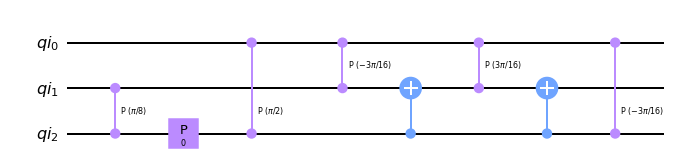

In [67]:
ai = 0
bi = pi/2
ci = pi/8
di = pi/4

qi = QuantumRegister(3, 'qi')
qci = QuantumCircuit(qi)


qci.cp(ci - ai, qi[2], qi[1])
qci.p(ai, qi[2])
qci.cp(bi - ai, qi[2], qi[0])

qci.cp((di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp(-(di - ci + ai - bi)/2, qi[1], qi[0])
qci.cx(qi[2], qi[1])
qci.cp((di - ci + ai - bi)/2, qi[2], qi[0])

qci.draw()

#### Unitary Simulator

In [68]:
backend_unitary_i = Aer.get_backend('unitary_simulator')
job_unitary_i = execute(qci, backend_unitary_i, shots=8192)
count_unitary_i = job_unitary_i.result().get_unitary()
array_to_latex(count_unitary_i, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

Now this looks a lot like $U_{j}$ matrix. So both the version, we just have to pay attention to $\text{QFT}$ part, depending on which version we used. For more info about $\text{QFT}$ and $\text{IQFT}$, refer to [Qiskit Textbook QFT Page](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)

### Circuit <a id="circuit"></a>


Now lets build the whole circuit part by part, by unitaries, and by eigenstates.

Creating a function to create $CU_{j}$

In [8]:
def controlled_unitary(qc, qubits: list, phases: list): # x,y,z = Specific Qubit; a,b,c,d = Phases
    qc.cp(phases[2]-phases[0], qubits[0], qubits[1]) # controlled-U1(c-a)
    qc.p(phases[0], qubits[0]) # U1(a)
    qc.cp(phases[1]-phases[0], qubits[0], qubits[2]) # controlled-U1(b-a)
    
    # controlled controlled U1(d-c+a-b)
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp(-(phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[0], qubits[2])

Now lets make the $U\ =\ U_{1}\ \otimes\ U_{2}\ \otimes\ U_{3}\ \otimes\ U_{4}$

In [9]:
def U(times, qc, unit, eigen, phases: list): # a,b,c = phases for U1; d,e,f = phases for U2; g,h,i = phases for U3; j,k,l = phases for U4; m_list=[m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l]
    controlled_unitary(qc, [unit[0]]+eigen[0:2], [0]+phases[0:3])
    controlled_unitary(qc, [unit[0]]+eigen[2:4], [phases[3]]+[0]+phases[4:6])
    controlled_unitary(qc, [unit[0]]+eigen[4:6], phases[6:8]+[0]+[phases[8]])
    controlled_unitary(qc, [unit[0]]+eigen[6:8], phases[9:12]+[0])

Now lets make final $CU$, $CU^{2}$, $CU^{4}$, $CU^{8}$, $CU^{16}$, $CU^{32}$

In [19]:
def final_U(times, eigen, phases: list):
    unit = QuantumRegister(1, 'unit')
    qc = QuantumCircuit(unit, eigen)
    for _ in range(2**times):
        U(times, qc, unit, eigen, phases)
    return qc.to_gate(label='U'+'_'+(str(2**times)))

Lets consider all the phases:

The phases are normalized to be bound within $[0,\ 2π]$ once we know the range of distances between the cities.

<table>
    <tr>
        <th>Phases</th>
        <th>Encoded as</th>
        <th>Phase value</th>
    </tr>
    <tr>
        <td>$\phi_{1\to1}$</td>
        <td></td>
        <td>$\text{0}$</td>
    </tr>
    <tr>
        <td>$\phi_{2\to1}$</td>
        <td>$\text{a}$</td>
        <td>$\frac{\pi}{2}$</td>
    </tr>
    <tr>
        <td>$\phi_{3\to1}$</td>
        <td>$\text{b}$</td>
        <td>$\frac{\pi}{8}$</td>
    </tr>
    <tr>
        <td>$\phi_{4\to1}$</td>
        <td>$\text{c}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>--</td>
        <td>--</td>
        <td>--</td>
    </tr>
    <tr>
        <td>$\phi_{1\to2}$</td>
        <td>$\text{d}$</td>
        <td>$\frac{\pi}{2}$</td>
    </tr>
    <tr>
        <td>$\phi_{2\to2}$</td>
        <td></td>
        <td>$\text{0}$</td>
    </tr>
    <tr>
        <td>$\phi_{3\to2}$</td>
        <td>$\text{e}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{4\to2}$</td>
        <td>$\text{f}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>--</td>
        <td>--</td>
        <td>--</td>
    </tr>
    <tr>
        <td>$\phi_{1\to3}$</td>
        <td>$\text{g}$</td>
        <td>$\frac{\pi}{8}$</td>
    </tr>
    <tr>
        <td>$\phi_{2\to3}$</td>
        <td>$\text{h}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{3\to3}$</td>
        <td></td>
        <td>$\text{0}$</td>
    </tr>
    <tr>
        <td>$\phi_{4\to3}$</td>
        <td>$\text{i}$</td>
        <td>$\frac{\pi}{8}$</td>
    </tr>
    <tr>
        <td>--</td>
        <td>--</td>
        <td>--</td>
    </tr>
    <tr>
        <td>$\phi_{1\to4}$</td>
        <td>$\text{j}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{2\to4}$</td>
        <td>$\text{k}$</td>
        <td>$\frac{\pi}{4}$</td>
    </tr>
    <tr>
        <td>$\phi_{3\to4}$</td>
        <td>$\text{l}$</td>
        <td>$\frac{\pi}{8}$</td>
    </tr>
    <tr>
        <td>$\phi_{4\to4}$</td>
        <td></td>
        <td>$\text{0}$</td>
    </tr>
</table>


Building the eigenstates

In [11]:
# Storing the eigenvalues in a list
eigen_values = ["11000110", "10001101", "11001001"]

# Function to place appropriate corresponding gate according to eigenstates
def eigenstates(qc, eigen, index):
    for i in range(0, len(eigen)):
        if eigen_values[index][i] == '1':
            qc.x(eigen[i])
        if eigen_values[index][i] == '0':
            pass
    qc.barrier()
    return qc

Building the circuit

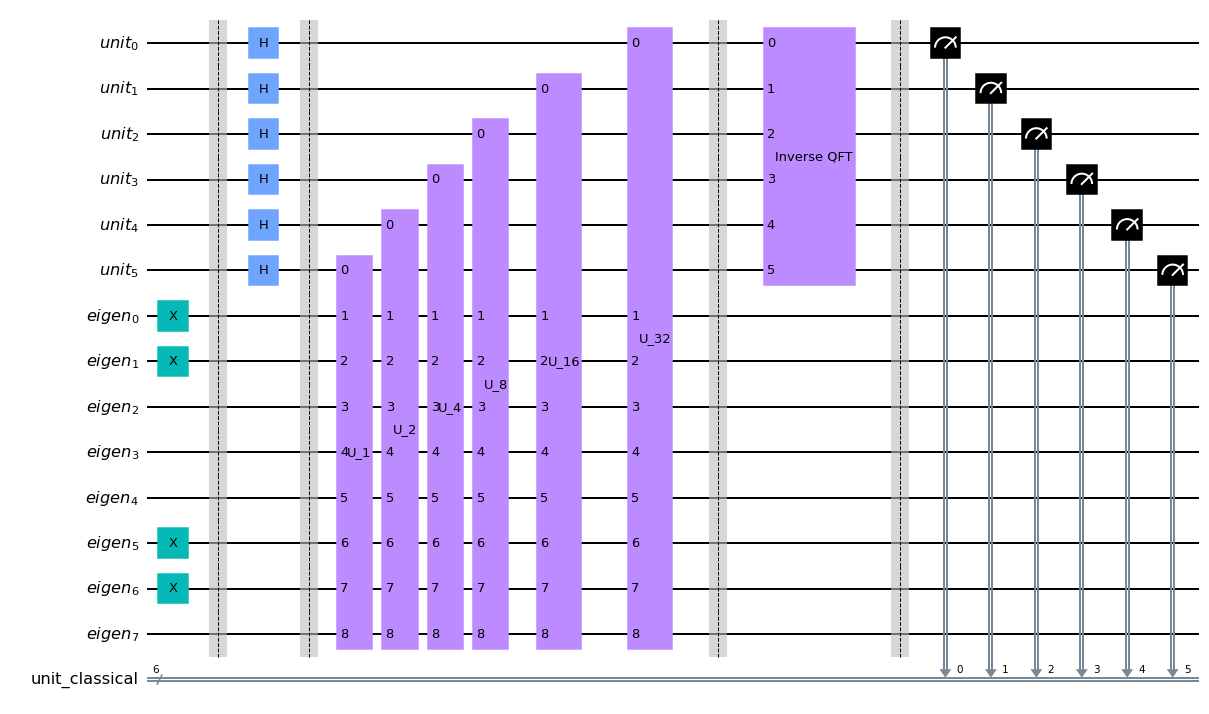

In [27]:
# Initialization
unit = QuantumRegister(6, 'unit')
eigen = QuantumRegister(8, 'eigen')
unit_classical = ClassicalRegister(6, 'unit_classical')
qc = QuantumCircuit(unit, eigen, unit_classical)
#

# Setting one eigenstate 
# Playing with the first eigenstate here i.e. 11000110 from eigen_values list.
# (Try to play with other eigenstates from the eigen_values list)
eigenstates(qc, eigen, 0)
#

# Hadamard on the 'unit' qubits
qc.h(unit[:])
qc.barrier()
#

# Controlled Unitary  
phases = [pi / 2, pi / 8, pi / 4, pi / 2, pi / 4, pi / 4, pi / 8, pi / 4, pi / 8, pi / 4, pi / 4, pi / 8] # a, b, c, d, e, f, g, h, i, j, k, l
for i in range(0, 6):
    qc.append(final_U(i, eigen, phases), [unit[5-i]] + eigen[:])
#

# Inverse QFT 
qc.barrier()
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=True, do_swaps=False, name='Inverse QFT')
qc.append(qft, qc.qubits[:len(unit)])
qc.barrier()
#

# Measure
qc.measure(unit, unit_classical)
#

# Draw
qc.draw()

#### QASM Simulator <a id="qasm_simulator"></a>

{'100100': 8192}


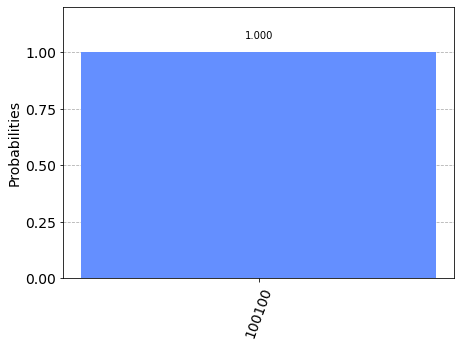

In [28]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)

### Conclusion <a id="conclusion"></a>


Firstly, this process is not complete yet. We only used the first eigenstates $|11000110\rangle$ here, this process has to be done for all the eigenstates to find the total distance for all the route. After that, use quantum search algorithm to find the minimum of those distances. This means, the time required scales with the number of eigenstates.

Secondly, the $\text{paper}^{[1]}$ we took the reference for this has many mistakes for the circuit. We fixed it and used the improved version.

Thirdly, Now that we have went theough the theory, concept and build the circuit, lets discuss-
Does using this process of quantum phase estimation to solve a problem of $\text{NP-Hard}$ gives a algorithm/way to solve these kind of problems more efficiently and optimally or in other word Is this a perfect solution ?
The answer is No. This process of using phase estimation, which encode the cost as phases is one of the many ways to solve these category of problems. But these approach is also not perfect. Perfect in the sense, it does not give any efficient algorithm to solve these (NP-Hard) problems in polynomial time.
In this process, we find all the possible Hamiltonian cycle in the graph and based on those cycle we calculated the total cost. But, keep in mind, Finding all Hamiltonian cycle of a graph is itself a NP-Complete problem. So we gave precomputed Hamiltonian cycle in the beginning to get the eigenstates. We used $\text{4}$ nodes/city, but for large number of cities say 10,000, finding all possible Hamiltonian cycle is tedious job.

### References <a id="references"></a>


This notebook/writing is based on:

* [1]. Karthik Srinivasan, Saipriya Satyajit, Bikash K Behera, and Prasanta K Panigrahi. [Efficient quantum algorithm for solving travelling salesman problem: An IBM quantum experience](https://arxiv.org/abs/1805.10928). *arXiv:1805.10928v1, 2018*.

* [2]. Adriano Barenco, Charles H. Bennett, Richard Cleve, David P. DiVincenzo, Norman Margolus, Peter Shor, Tycho Sleator, John Smolin, Harald Weinfurter. [Elementary gates for quantum computation](https://arxiv.org/abs/quant-ph/9503016). *arXiv:9503016v1, 1995*.


### Version Information <a id="version_information"></a>

In [77]:
import qiskit.tools.jupyter
%qiskit_version_table

Qiskit Software,Version
qiskit-terra,0.18.1
qiskit-aer,0.8.2
qiskit-ignis,0.6.0
qiskit-ibmq-provider,0.16.0
qiskit-aqua,0.9.4
qiskit,0.29.0
qiskit-nature,0.1.5
qiskit-finance,0.2.0
qiskit-optimization,0.2.1
qiskit-machine-learning,0.2.0
